## Hart Algorithm Example

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [53]:
from __future__ import print_function
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = (13, 6)

In [54]:
import os, sys
sys.path.append(os.path.join(os.path.abspath(''), "nilmtk2"))
from nilmtk2 import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk2.legacy.disaggregate import CombinatorialOptimisation
from nilmtk2.utils import print_dict
from nilmtk2.metrics import f1_score

## Import Data from HDF file

In [55]:
# data = DataSet('./data/AMPds2.h5')
data = DataSet('PGE.h5')
print('Loaded', len(data.buildings), 'buildings')

<class 'pandas.io.pytables.HDFStore'>
File path: PGE.h5

YOLO!!!!
<class 'pandas.io.pytables.HDFStore'>
File path: PGE.h5

YOLO!!!!
<class 'pandas.io.pytables.HDFStore'>
File path: PGE.h5

YOLO!!!!
Loaded 1 buildings


c:\Users\Sphax\source\House improvement\nilmtk2\nilmtk2\metergroup.py:86: RuntimeWarning: Building 1 has an empty 'appliances' list.
  .format(building_id.instance), RuntimeWarning)


## Loading data for Building 1

In [56]:
elec = data.buildings[1].elec

In [57]:
elec.get_timeframe()

TimeFrame(start='2021-01-31 16:00:00-08:00', end='2021-09-30 16:45:00-07:00', empty=False)

In [58]:
data.buildings[1].elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='PG&E', site_meter, appliances=[])
)

## Set a window

In [59]:
data.set_window(start='2021-01-01',end='2021-08-24')
elec_1 = data.buildings[1].elec

## Mains and Submeters Data

In [60]:
mains=elec_1.mains()
submeters=elec_1.submeters()

In [61]:
mains

ElecMeter(instance=1, building=1, dataset='PG&E', site_meter, appliances=[])

In [62]:
for i in mains.load(verbose=True):
    print(i)


ElecMeter.load
{'verbose': True}
kwargs after setting resample setting:
{'verbose': True}
kwargs after processing
{'verbose': True}
Source node
<nilmtk2.node.Node object at 0x0000024EDEDF1048> <generator object load at 0x0000024EDEE15678>
LOADING !!
HDFDataStore.load(key='/building1/elec/meter1', columns='[('power', 'active')]', sections='[TimeFrame(start='None', end='None', empty=False)]', n_look_ahead_rows='0', chunksize='268435456')
    TimeFrame(start='None', end='None', empty=False)
physical_quantity          power
type                      active
TS                              
2021-01-31 16:00:00-08:00   0.03
2021-01-31 16:15:00-08:00   0.03
2021-01-31 16:30:00-08:00   0.03
2021-01-31 16:45:00-08:00   0.03
2021-01-31 17:00:00-08:00   0.04
...                          ...
2021-08-23 22:45:00-07:00   0.06
2021-08-23 23:00:00-07:00   0.06
2021-08-23 23:15:00-07:00   0.06
2021-08-23 23:30:00-07:00   0.06
2021-08-23 23:45:00-07:00   0.06

[19608 rows x 1 columns]


## Running HART_85

In [63]:
df = next(mains.load())

from nilmtk2.disaggregate.hart_85 import Hart85
h = Hart85({})
if (os.path.isfile('model.pickle')):
    h.import_model('model.pickle')
else:
    h.partial_fit([df], [], columns=[('power','active')], noise_level = 0.03, state_threshold=0.009, min_tolerance=0.1, large_transition=1)
    h.export_model('model.pickle')



ElecMeter.load
{}
kwargs after setting resample setting:
{}
kwargs after processing
{}
Source node
<nilmtk2.node.Node object at 0x0000024EDF59BB38> <generator object load at 0x0000024EDE7DEA40>
LOADING !!
...........................Hart_85 Partial Fit Running...............
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
.........................Hart_85 Partial Fit End....................
..............................Predicting Centroid Matching..........................


c:\Users\Sphax\source\House improvement\nilmtk2\nilmtk2\disaggregate\hart_85.py:529: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  power[i] = self.centroids.ix[appliance].values[0]
c:\Users\Sphax\source\House improvement\nilmtk2\nilmtk2\disaggregate\hart_85.py:532: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  power[i] = self.centroids.ix[appliance].values[0]


...................................End Centroid Matching............................


#### Please set columns accordingly 
#### For REDD, since mains is 'Apparent Power'
#### For IAWE, you may set columns to columns= [('power','active')] or to columns= [('power','active'),('power','reactive')]


## Train the model

In [64]:
result=h.disaggregate_chunk([df])
print(result)

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


c:\Users\Sphax\source\House improvement\nilmtk2\nilmtk2\disaggregate\hart_85.py:529: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  power[i] = self.centroids.ix[appliance].values[0]
c:\Users\Sphax\source\House improvement\nilmtk2\nilmtk2\disaggregate\hart_85.py:532: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  power[i] = self.centroids.ix[appliance].values[0]


                                  0         1    2
TS                                                
2021-01-31 16:00:00-08:00  0.000000  0.000000  0.0
2021-01-31 16:15:00-08:00  0.000000  0.000000  0.0
2021-01-31 16:30:00-08:00  0.000000  0.000000  0.0
2021-01-31 16:45:00-08:00  0.000000  0.000000  0.0
2021-01-31 17:00:00-08:00  0.000000  0.000000  0.0
...                             ...       ...  ...
2021-08-23 22:45:00-07:00  0.031965  0.013042  0.0
2021-08-23 23:00:00-07:00  0.031965  0.013042  0.0
2021-08-23 23:15:00-07:00  0.031965  0.013042  0.0
2021-08-23 23:30:00-07:00  0.031965  0.013042  0.0
2021-08-23 23:45:00-07:00  0.000000  0.000000  0.0

[19608 rows x 3 columns]


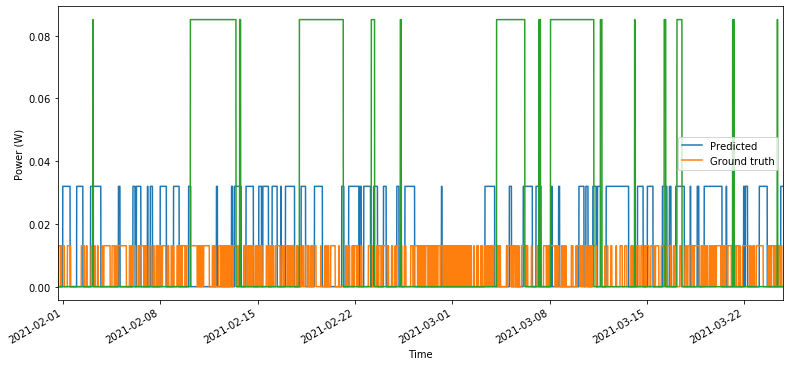

In [66]:
for i in range(3):
    result[i][0:5000].plot()
plt.legend(["Predicted", "Ground truth"]);
plt.ylabel("Power (W)")
plt.xlabel("Time");

## Returned Disaggregated Dataframe

In [ ]:
df.tail()

physical_quantity,power
type,active
TS,
2021-08-23 22:45:00-07:00,0.06
2021-08-23 23:00:00-07:00,0.06
2021-08-23 23:15:00-07:00,0.06
2021-08-23 23:30:00-07:00,0.06
2021-08-23 23:45:00-07:00,0.06


## Since Hart is unsupervised, Find best matched appliances to disaggregated output.

In [ ]:
h.best_matched_appliance(submeters,df)

ValueError: max() arg is an empty sequence

## So it shows column 0's appliance best matches with Fridge, 1-> dish washer, 2-> washer dryer

In [ ]:
elec  

## Comparing for Fridge

In [ ]:
# First we need to take intersection of indices of dataframes of fridge and predicted (Inner Join)
df_fridge = next(elec_1['heat pump', 1].load())
merged_df = pd.merge(df[1], df_fridge, left_index=True, right_index=True)

In [ ]:
merged_df.head()

In [ ]:
(merged_df[1][0:5000].sum() - merged_df['power', 'active'][0:5000].sum()) / merged_df[1][0:5000].sum()

In [ ]:
merged_df[1][0:6000].plot(c='r')
merged_df['power', 'active'][0:6000].plot()
plt.legend(["Predicted", "Ground truth"]);
plt.ylabel("Power (W)")
plt.xlabel("Time");

## Comparing for  Washer Dryer

In [ ]:
df_dish_washer = next(elec_1['washer dryer', 1].load())
merged_df = pd.merge(df[2], df_fridge, left_index=True, right_index=True)

In [ ]:
merged_df.head()

In [ ]:
ax1 = merged_df[2].plot(c='r')
ax2 = merged_df['power', 'active'].plot(c='grey')
ax1.legend(["Predicted", "Ground truth"])
plt.ylabel("Power (W)")
plt.xlabel("Time");